# Analyzing global internet patterns

## 📖 Background
In this competition, you'll be exploring a dataset that highlights internet usage for different countries from 2000 to 2023. Your goal is import, clean, analyze and visualize the data in your preferred tool.

The end goal will be a clean, self explanatory, and interactive visualization. By conducting a thorough analysis, you'll dive deeper into how internet usage has changed over time and the countries still widely impacted by lack of internet availability. 


## 💾 Data

#### You have access to the following file, but you can supplement your data with other sources to enrich your analysis. 

### Interet Usage (`internet_usage.csv`)
|   Column name  |   Description | 
|---------------|-----------|
| Country Name | Name of the country |
| Country Code | Countries 3 character country code|
| 2000 | Contains the % of population of individuals using the internet in 2000  |
| 2001 | Contains the % of population of individuals using the internet in 2001  |
| 2002 | Contains the % of population of individuals using the internet in 2002  |
| 2003 | Contains the % of population of individuals using the internet in 2003  |
| .... | ...  |
| 2023 | Contains the % of population of individuals using the internet in 2023  |

**The data can be downloaded from the _Files_ section (_File_ > _Show workbook files_).**

In [13]:
import pandas as pd
data = pd.read_csv("data/internet_usage.csv") 
data.head(10)

Country Name Country Code      2000        2001       2002  \
0          Afghanistan          AFG        ..  0.00472257  0.0045614   
1              Albania          ALB  0.114097    0.325798   0.390081   
2              Algeria          DZA  0.491706    0.646114    1.59164   
3       American Samoa          ASM        ..          ..         ..   
4              Andorra          AND   10.5388          ..    11.2605   
5               Angola          AGO  0.105046    0.136014   0.270377   
6  Antigua and Barbuda          ATG   6.48223     8.89929       12.5   
7            Argentina          ARG   7.03868     9.78081    10.8821   
8              Armenia          ARM   1.30047     1.63109    1.96041   
9                Aruba          ABW   15.4428        17.1       18.8   

        2003      2004     2005     2006     2007  ...     2014     2015  \
0  0.0878913  0.105809  1.22415  2.10712      1.9  ...        7     8.26   
1     0.9719   2.42039  6.04389  9.60999  15.0361  ...     54.3     56.9   
2    2.19536   4.63448  5.84394  7.37598  9.45119  ...     29.5     38.2   
3         ..        ..       ..       ..       ..  ...       ..       ..   
4    13.5464    26.838  37.6058  48.9368    70.87  ...     86.1     87.9   
5   0.370682  0.464815  1.14337      1.5      1.7  ...  21.3623       22   
6    17.2286   24.2665       27       30       34  ...    67.78       70   
7    11.9137   16.0367  17.7206  20.9272  25.9466  ...     64.7  68.0431   
8    4.57522   4.89901  5.25298  5.63179  6.02125  ...  54.6228  59.1008   
9       20.8        23     25.4       28     30.9  ...    83.78  88.6612   

      2016     2017     2018     2019     2020     2021     2022     2023  
0       11     13.5     16.8     17.6     18.4       ..       ..       ..  
1     59.6     62.4     65.4  68.5504  72.2377  79.3237  82.6137  83.1356  
2  42.9455  47.6911  49.0385  58.9776  60.6534  66.2356  71.2432       ..  
3       ..       ..       ..       ..       ..       ..       ..       ..  
4     89.7  91.5675       ..  90.7187  93.2056  93.8975  94.4855       ..  
5     23.2       26       29  32.1294  36.6347  37.8067  39.2935       ..  
6       73     76.2     79.6     83.2  86.8837   87.074  91.4123       ..  
7   70.969  74.2949     77.7   79.947  85.5144  87.1507  88.3754   89.229  
8   64.346  64.7449  68.2451  66.5439  76.5077  78.6123  77.0277       ..  
9  93.5425    97.17       ..       ..       ..       ..       ..       ..  

[10 rows x 26 columns]

In [14]:
import pandas as pd

# Assuming 'data' is your DataFrame
df = pd.melt(data, 
                    id_vars=['Country Name', 'Country Code'],  # Columns to keep
                    var_name='Year',  # Name for the 'Year' column
                    value_name='Internet Usage')  # Name for the 'Internet Usage' column

# Optionally, convert 'Year' to int
df['Year'] = df['Year'].astype(int)

df.head()

Country Name Country Code  Year Internet Usage
0     Afghanistan          AFG  2000             ..
1         Albania          ALB  2000       0.114097
2         Algeria          DZA  2000       0.491706
3  American Samoa          ASM  2000             ..
4         Andorra          AND  2000        10.5388

In [15]:
continent_mapping = {
    'Afghanistan': 'Asia',
    'Albania': 'Europe',
    'Algeria': 'Africa',
    'American Samoa': 'Oceania',
    'Andorra': 'Europe',
    'Angola': 'Africa',
    'Antigua and Barbuda': 'North America',
    'Argentina': 'South America',
    'Armenia': 'Asia',
    'Aruba': 'North America',
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'Azerbaijan': 'Asia',
    'Bahamas, The': 'North America',
    'Bahrain': 'Asia',
    'Bangladesh': 'Asia',
    'Barbados': 'North America',
    'Belarus': 'Europe',
    'Belgium': 'Europe',
    'Belize': 'North America',
    'Benin': 'Africa',
    'Bermuda': 'North America',
    'Bhutan': 'Asia',
    'Bolivia': 'South America',
    'Bosnia and Herzegovina': 'Europe',
    'Botswana': 'Africa',
    'Brazil': 'South America',
    'British Virgin Islands': 'North America',
    'Brunei Darussalam': 'Asia',
    'Bulgaria': 'Europe',
    'Burkina Faso': 'Africa',
    'Burundi': 'Africa',
    'Cabo Verde': 'Africa',
    'Cambodia': 'Asia',
    'Cameroon': 'Africa',
    'Canada': 'North America',
    'Cayman Islands': 'North America',
    'Central African Republic': 'Africa',
    'Chad': 'Africa',
    'Channel Islands': 'Europe',
    'Chile': 'South America',
    'China': 'Asia',
    'Colombia': 'South America',
    'Comoros': 'Africa',
    'Congo, Dem. Rep.': 'Africa',
    'Congo, Rep.': 'Africa',
    'Costa Rica': 'North America',
    "Cote d'Ivoire": 'Africa',
    'Croatia': 'Europe',
    'Cuba': 'North America',
    'Curacao': 'North America',
    'Cyprus': 'Asia',
    'Czechia': 'Europe',
    'Denmark': 'Europe',
    'Djibouti': 'Africa',
    'Dominica': 'North America',
    'Dominican Republic': 'North America',
    'Ecuador': 'South America',
    'Egypt, Arab Rep.': 'Africa',
    'El Salvador': 'North America',
    'Equatorial Guinea': 'Africa',
    'Eritrea': 'Africa',
    'Estonia': 'Europe',
    'Eswatini': 'Africa',
    'Ethiopia': 'Africa',
    'Faroe Islands': 'Europe',
    'Fiji': 'Oceania',
    'Finland': 'Europe',
    'France': 'Europe',
    'French Polynesia': 'Oceania',
    'Gabon': 'Africa',
    'Gambia, The': 'Africa',
    'Georgia': 'Asia',
    'Germany': 'Europe',
    'Ghana': 'Africa',
    'Gibraltar': 'Europe',
    'Greece': 'Europe',
    'Greenland': 'North America',
    'Grenada': 'North America',
    'Guam': 'Oceania',
    'Guatemala': 'North America',
    'Guinea': 'Africa',
    'Guinea-Bissau': 'Africa',
    'Guyana': 'South America',
    'Haiti': 'North America',
    'Honduras': 'North America',
    'Hong Kong SAR, China': 'Asia',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Iran, Islamic Rep.': 'Asia',
    'Iraq': 'Asia',
    'Ireland': 'Europe',
    'Isle of Man': 'Europe',
    'Israel': 'Asia',
    'Italy': 'Europe',
    'Jamaica': 'North America',
    'Japan': 'Asia',
    'Jordan': 'Asia',
    'Kazakhstan': 'Asia',
    'Kenya': 'Africa',
    'Kiribati': 'Oceania',
    "Korea, Dem. People's Rep.": 'Asia',
    'Korea, Rep.': 'Asia',
    'Kosovo': 'Europe',
    'Kuwait': 'Asia',
    'Kyrgyz Republic': 'Asia',
    'Lao PDR': 'Asia',
    'Latvia': 'Europe',
    'Lebanon': 'Asia',
    'Lesotho': 'Africa',
    'Liberia': 'Africa',
    'Libya': 'Africa',
    'Liechtenstein': 'Europe',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Macao SAR, China': 'Asia',
    'Madagascar': 'Africa',
    'Malawi': 'Africa',
    'Malaysia': 'Asia',
    'Maldives': 'Asia',
    'Mali': 'Africa',
    'Malta': 'Europe',
    'Marshall Islands': 'Oceania',
    'Mauritania': 'Africa',
    'Mauritius': 'Africa',
    'Mexico': 'North America',
    'Micronesia, Fed. Sts.': 'Oceania',
    'Moldova': 'Europe',
    'Monaco': 'Europe',
    'Mongolia': 'Asia',
    'Montenegro': 'Europe',
    'Morocco': 'Africa',
    'Mozambique': 'Africa',
    'Myanmar': 'Asia',
    'Namibia': 'Africa',
    'Nauru': 'Oceania',
    'Nepal': 'Asia',
    'Netherlands': 'Europe',
    'New Caledonia': 'Oceania',
    'New Zealand': 'Oceania',
    'Nicaragua': 'North America',
    'Niger': 'Africa',
    'Nigeria': 'Africa',
    'North Macedonia': 'Europe',
    'Northern Mariana Islands': 'Oceania',
    'Norway': 'Europe',
    'Oman': 'Asia',
    'Pakistan': 'Asia',
    'Palau': 'Oceania',
    'Panama': 'North America',
    'Papua New Guinea': 'Oceania',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Philippines': 'Asia',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Puerto Rico': 'North America',
    'Qatar': 'Asia',
    'Romania': 'Europe',
    'Russian Federation': 'Europe',
    'Rwanda': 'Africa',
    'Samoa': 'Oceania',
    'San Marino': 'Europe',
    'Sao Tome and Principe': 'Africa',
    'Saudi Arabia': 'Asia',
    'Senegal': 'Africa',
    'Serbia': 'Europe',
    'Seychelles': 'Africa',
    'Sierra Leone': 'Africa',
    'Singapore': 'Asia',
    'Sint Maarten (Dutch part)': 'North America',
    'Slovak Republic': 'Europe',
    'Slovenia': 'Europe',
    'Solomon Islands': 'Oceania',
    'Somalia': 'Africa',
    'South Africa': 'Africa',
    'South Sudan': 'Africa',
    'Spain': 'Europe',
    'Sri Lanka': 'Asia',
    'St. Kitts and Nevis': 'North America',
    'St. Lucia': 'North America',
    'St. Martin (French part)': 'North America',
    'St. Vincent and the Grenadines': 'North America',
    'Sudan': 'Africa',
    'Suriname': 'South America',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Syrian Arab Republic': 'Asia',
    'Tajikistan': 'Asia',
    'Tanzania': 'Africa',
    'Thailand': 'Asia',
    'Timor-Leste': 'Asia',
    'Togo': 'Africa',
    'Tonga': 'Oceania',
    'Trinidad and Tobago': 'North America',
    'Tunisia': 'Africa',
    'Turkiye': 'Asia',
    'Turkmenistan': 'Asia',
    'Turks and Caicos Islands': 'North America',
    'Tuvalu': 'Oceania',
    'Uganda': 'Africa',
    'Ukraine': 'Europe',
    'United Arab Emirates': 'Asia',
    'United Kingdom': 'Europe',
    'United States': 'North America',
    'Uruguay': 'South America',
    'Uzbekistan': 'Asia',
    'Vanuatu': 'Oceania',
    'Venezuela, RB': 'South America',
    'Viet Nam': 'Asia',
    'Virgin Islands (U.S.)': 'North America',
    'West Bank and Gaza': 'Asia',
    'Yemen, Rep.': 'Asia',
    'Zambia': 'Africa',
    'Zimbabwe': 'Africa'
}


In [16]:
# Add the continent column
df['Continent'] = df['Country Name'].map(continent_mapping)

# View the updated DataFrame
df.head()

Country Name Country Code  Year Internet Usage Continent
0     Afghanistan          AFG  2000             ..      Asia
1         Albania          ALB  2000       0.114097    Europe
2         Algeria          DZA  2000       0.491706    Africa
3  American Samoa          ASM  2000             ..   Oceania
4         Andorra          AND  2000        10.5388    Europe

In [17]:
min(df['Year'])

2000

In [18]:
max(df['Year'])

2023

In [19]:
# Define the year intervals (2000-2009, 2010-2019, 2020-2029, etc.)
bins = [2000, 2010, 2020, 2030]  # 2000-2009, 2010-2019, 2020-2029
labels = ['2000-2009', '2010-2019', '2020-2029']

# Add a new column to the dataframe with the decade classification
df['Decade_Interval'] = pd.cut(df['Year'], bins=bins, labels=labels, right=False)

# View the resulting dataframe
df.head()

Country Name Country Code  Year Internet Usage Continent Decade_Interval
0     Afghanistan          AFG  2000             ..      Asia       2000-2009
1         Albania          ALB  2000       0.114097    Europe       2000-2009
2         Algeria          DZA  2000       0.491706    Africa       2000-2009
3  American Samoa          ASM  2000             ..   Oceania       2000-2009
4         Andorra          AND  2000        10.5388    Europe       2000-2009

In [20]:
# Ensure the 'Internet Usage' column is numeric
df['Internet Usage'] = pd.to_numeric(df['Internet Usage'], errors='coerce')

# Descriptive statistics for each year
descriptive_stats = df.groupby('Year')['Internet Usage'].agg(['mean', 'median', 'std', 'min', 'max', 'count', 
                                                              lambda x: x.quantile(0.25), 
                                                              lambda x: x.quantile(0.75)]).rename(
    columns={'<lambda_0>': '25%', '<lambda_1>': '75%'})

# Rename the lambda columns for clarity
descriptive_stats.columns = ['Mean', 'Median', 'Std', 'Min', 'Max', 'Count', '25%', '75%']

descriptive_stats


Mean     Median        Std        Min       Max  Count        25%  \
Year                                                                           
2000   8.732304   2.322545  13.321323   0.000000   52.0000    196   0.380223   
2001  10.653857   2.987160  15.479203   0.000000   64.0000    199   0.455810   
2002  13.617630   4.768315  18.354699   0.000000   79.1200    202   1.058300   
2003  16.108085   6.608140  20.347061   0.000000   83.1400    196   1.514020   
2004  18.520151   8.425120  21.756789   0.000000   83.8900    199   2.137760   
2005  20.799100  11.245250  22.990212   0.000000   87.0000    200   2.866345   
2006  23.379992  14.182000  24.130128   0.000000   89.5100    199   3.734475   
2007  25.597037  16.490000  25.308175   0.000000   90.6000    204   4.080000   
2008  28.513325  21.760000  26.369437   0.000000   91.0000    202   5.307250   
2009  31.238002  26.445000  27.111498   0.000000   93.0000    202   6.605000   
2010  34.320575  30.650000  27.547549   0.000000   93.3900    201   8.000000   
2011  37.054038  35.010000  27.977935   0.000000   94.8197    204   9.950000   
2012  39.778629  37.550000  28.718429   0.000000   96.2098    202  11.361975   
2013  42.138295  41.400000  29.350359   0.000000   96.5468    201  13.900000   
2014  45.211018  46.200000  29.229028   0.990000   98.1580    201  17.143200   
2015  48.034621  50.219650  28.958586   1.083730   98.3236    200  21.605000   
2016  51.389652  54.000000  28.764813   1.177120   98.2400    203  24.050000   
2017  54.664937  59.828050  28.169512   2.004050   99.5466    206  27.810775   
2018  57.863789  63.150000  26.989491   4.000000   99.6528    176  35.855075   
2019  61.250281  68.606000  26.581197   6.017815   99.7015    186  42.306450   
2020  64.492320  72.175250  26.200298   7.400000  100.0000    192  41.772318   
2021  67.880720  75.651350  25.496128   9.642410  100.0000    190  49.958850   
2022  71.291703  79.126900  24.284565  11.275000  100.0000    183  56.861350   
2023  87.666746  89.535200  12.983169  18.000000  100.0000     59  85.068600   

            75%  
Year             
2000   9.515232  
2001  13.886900  
2002  19.248925  
2003  23.932800  
2004  27.958950  
2005  34.215725  
2006  38.000000  
2007  40.952500  
2008  46.030000  
2009  51.527500  
2010  55.000000  
2011  58.550925  
2012  63.577500  
2013  66.450000  
2014  70.000000  
2015  72.208675  
2016  76.295600  
2017  78.843850  
2018  80.508725  
2019  83.044725  
2020  85.481850  
2021  87.390025  
2022  89.693700  
2023  94.939000

In [21]:
df.head()

Country Name Country Code  Year  Internet Usage Continent Decade_Interval
0     Afghanistan          AFG  2000             NaN      Asia       2000-2009
1         Albania          ALB  2000        0.114097    Europe       2000-2009
2         Algeria          DZA  2000        0.491706    Africa       2000-2009
3  American Samoa          ASM  2000             NaN   Oceania       2000-2009
4         Andorra          AND  2000       10.538800    Europe       2000-2009

In [22]:
df.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023])

In [23]:
import wbgapi as wb

In [24]:
import wbgapi as wb
import pandas as pd

# Define the indicators
indicators = {
    'SL.TLF.TOTL.IN': 'Labor_Force_Total',
    'SE.TER.ENRR': 'School_Enrollment_Tertiary',
    'NY.GDY.TOTL.KN': 'Gross_Domestic_Income',
    'IC.BUS.EASE.XQ': 'Ease_of_Doing_Business',
    'EG.ELC.ACCS.ZS': 'Access_to_Electricity'
}

# Initialize an empty list to store fetched data
data_list = []

# Loop through each indicator and fetch data
for indicator, name in indicators.items():
    data = wb.data.DataFrame(indicator, df['Country Code'].unique().tolist(), df['Year'].unique().tolist())
    data = data.stack().reset_index()
    data.columns = ['Country Code', 'Year', name]
    data_list.append(data)

# Merge all indicator data
merged_data = data_list[0]
for i in range(1, len(data_list)):
    merged_data = pd.merge(merged_data, data_list[i], on=['Country Code', 'Year'], how='outer')

# **Fix 'YR' prefix in Year column**
merged_data['Year'] = merged_data['Year'].str.replace('YR', '').astype(int)

# Ensure data types match
df['Year'] = df['Year'].astype(int)  # Convert original DataFrame Year column to int

# Merge with the original DataFrame
df = pd.merge(df, merged_data, on=['Country Code', 'Year'], how='left')

# Display the updated DataFrame
df.head()

Country Name Country Code  Year  Internet Usage Continent  \
0     Afghanistan          AFG  2000             NaN      Asia   
1         Albania          ALB  2000        0.114097    Europe   
2         Algeria          DZA  2000        0.491706    Africa   
3  American Samoa          ASM  2000             NaN   Oceania   
4         Andorra          AND  2000       10.538800    Europe   

  Decade_Interval  Labor_Force_Total  School_Enrollment_Tertiary  \
0       2000-2009          4685110.0                         NaN   
1       2000-2009          1313953.0                         NaN   
2       2000-2009          9068833.0                         NaN   
3       2000-2009                NaN                         NaN   
4       2000-2009                NaN                         NaN   

   Gross_Domestic_Income  Ease_of_Doing_Business  Access_to_Electricity  
0                    NaN                     NaN                    4.4  
1           7.406499e+11                     NaN                   99.4  
2           4.743665e+12                     NaN                   98.6  
3                    NaN                     NaN                    NaN  
4                    NaN                     NaN                  100.0

In [25]:
df['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023])

In [26]:
# Remove 'Channel Islands' and 'West Bank and Gaza'
df = df[~df['Country Name'].isin(['Channel Islands', 'West Bank and Gaza'])]

# Replace 'Bahamas, The' with 'Bahamas'
df['Country Name'] = df['Country Name'].replace({'Bahamas, The': 'Bahamas'})

In [27]:
development_mapping = {
    'Afghanistan': 'Underdeveloped',
    'Albania': 'Developing',
    'Algeria': 'Developing',
    'American Samoa': 'Developing',
    'Andorra': 'Developed',
    'Angola': 'Developing',
    'Antigua and Barbuda': 'Developed',
    'Argentina': 'Developing',
    'Armenia': 'Developing',
    'Aruba': 'Developed',
    'Australia': 'Developed',
    'Austria': 'Developed',
    'Azerbaijan': 'Developing',
    'Bahamas, The': 'Developed',
    'Bahrain': 'Developed',
    'Bangladesh': 'Developing',
    'Barbados': 'Developed',
    'Belarus': 'Developing',
    'Belgium': 'Developed',
    'Belize': 'Developing',
    'Benin': 'Underdeveloped',
    'Bermuda': 'Developed',
    'Bhutan': 'Developing',
    'Bolivia': 'Developing',
    'Bosnia and Herzegovina': 'Developing',
    'Botswana': 'Developing',
    'Brazil': 'Developing',
    'British Virgin Islands': 'Developed',
    'Brunei Darussalam': 'Developed',
    'Bulgaria': 'Developing',
    'Burkina Faso': 'Underdeveloped',
    'Burundi': 'Underdeveloped',
    'Cabo Verde': 'Developing',
    'Cambodia': 'Developing',
    'Cameroon': 'Developing',
    'Canada': 'Developed',
    'Cayman Islands': 'Developed',
    'Central African Republic': 'Underdeveloped',
    'Chad': 'Underdeveloped',
    'Channel Islands': 'Developed',
    'Chile': 'Developing',
    'China': 'Developing',
    'Colombia': 'Developing',
    'Comoros': 'Underdeveloped',
    'Congo, Dem. Rep.': 'Underdeveloped',
    'Congo, Rep.': 'Developing',
    'Costa Rica': 'Developing',
    "Cote d'Ivoire": 'Developing',
    'Croatia': 'Developed',
    'Cuba': 'Developing',
    'Curacao': 'Developed',
    'Cyprus': 'Developed',
    'Czechia': 'Developed',
    'Denmark': 'Developed',
    'Djibouti': 'Underdeveloped',
    'Dominica': 'Developing',
    'Dominican Republic': 'Developing',
    'Ecuador': 'Developing',
    'Egypt, Arab Rep.': 'Developing',
    'El Salvador': 'Developing',
    'Equatorial Guinea': 'Developing',
    'Eritrea': 'Underdeveloped',
    'Estonia': 'Developed',
    'Eswatini': 'Developing',
    'Ethiopia': 'Underdeveloped',
    'Faroe Islands': 'Developed',
    'Fiji': 'Developing',
    'Finland': 'Developed',
    'France': 'Developed',
    'French Polynesia': 'Developed',
    'Gabon': 'Developing',
    'Gambia, The': 'Underdeveloped',
    'Georgia': 'Developing',
    'Germany': 'Developed',
    'Ghana': 'Developing',
    'Gibraltar': 'Developed',
    'Greece': 'Developed',
    'Greenland': 'Developed',
    'Grenada': 'Developed',
    'Guam': 'Developed',
    'Guatemala': 'Developing',
    'Guinea': 'Underdeveloped',
    'Guinea-Bissau': 'Underdeveloped',
    'Guyana': 'Developing',
    'Haiti': 'Underdeveloped',
    'Honduras': 'Developing',
    'Hong Kong SAR, China': 'Developed',
    'Hungary': 'Developed',
    'Iceland': 'Developed',
    'India': 'Developing',
    'Indonesia': 'Developing',
    'Iran, Islamic Rep.': 'Developing',
    'Iraq': 'Developing',
    'Ireland': 'Developed',
    'Isle of Man': 'Developed',
    'Israel': 'Developed',
    'Italy': 'Developed',
    'Jamaica': 'Developing',
    'Japan': 'Developed',
    'Jordan': 'Developing',
    'Kazakhstan': 'Developing',
    'Kenya': 'Developing',
    'Kiribati': 'Underdeveloped',
    "Korea, Dem. People's Rep.": 'Underdeveloped',
    'Korea, Rep.': 'Developed',
    'Kosovo': 'Developing',
    'Kuwait': 'Developed',
    'Kyrgyz Republic': 'Developing',
    'Lao PDR': 'Developing',
    'Latvia': 'Developed',
    'Lebanon': 'Developing',
    'Lesotho': 'Underdeveloped',
    'Liberia': 'Underdeveloped',
    'Libya': 'Developing',
    'Liechtenstein': 'Developed',
    'Lithuania': 'Developed',
    'Luxembourg': 'Developed',
    'Macao SAR, China': 'Developed',
    'Madagascar': 'Underdeveloped',
    'Malawi': 'Underdeveloped',
    'Malaysia': 'Developing',
    'Maldives': 'Developing',
    'Mali': 'Underdeveloped',
    'Malta': 'Developed',
    'Marshall Islands': 'Oceania',
    'Mauritania': 'Underdeveloped',
    'Mauritius': 'Developing',
    'Mexico': 'Developing',
    'Micronesia, Fed. Sts.': 'Underdeveloped',
    'Moldova': 'Developing',
    'Monaco': 'Developed',
    'Mongolia': 'Developing',
    'Montenegro': 'Developing',
    'Morocco': 'Developing',
    'Mozambique': 'Underdeveloped',
    'Myanmar': 'Underdeveloped',
    'Namibia': 'Developing',
    'Nauru': 'Developed',
    'Nepal': 'Underdeveloped',
    'Netherlands': 'Developed',
    'New Caledonia': 'Developed',
    'New Zealand': 'Developed',
    'Nicaragua': 'Developing',
    'Niger': 'Underdeveloped',
    'Nigeria': 'Developing',
    'North Macedonia': 'Developing',
    'Northern Mariana Islands': 'Developed',
    'Norway': 'Developed',
    'Oman': 'Developed',
    'Pakistan': 'Developing',
    'Palau': 'Developed',
    'Panama': 'Developing',
    'Papua New Guinea': 'Underdeveloped',
    'Paraguay': 'Developing',
    'Peru': 'Developing',
    'Philippines': 'Developing',
    'Poland': 'Developed',
    'Portugal': 'Developed',
    'Puerto Rico': 'Developed',
    'Qatar': 'Developed',
    'Romania': 'Developing',
    'Russian Federation': 'Developing',
    'Rwanda': 'Underdeveloped',
    'Samoa': 'Developing',
    'San Marino': 'Developed',
    'Sao Tome and Principe': 'Underdeveloped',
    'Saudi Arabia': 'Developed',
    'Senegal': 'Developing',
    'Serbia': 'Developing',
    'Seychelles': 'Developing',
    'Sierra Leone': 'Underdeveloped',
    'Singapore': 'Developed',
    'Sint Maarten (Dutch part)': 'Developed',
    'Slovak Republic': 'Developed',
    'Slovenia': 'Developed',
    'Solomon Islands': 'Underdeveloped',
    'Somalia': 'Underdeveloped',
    'South Africa': 'Developing',
    'South Sudan': 'Underdeveloped',
    'Spain': 'Developed',
    'Sri Lanka': 'Developing',
    'St. Kitts and Nevis': 'Developed',
    'St. Lucia': 'Developed',
    'St. Martin (French part)': 'Developed',
    'St. Vincent and the Grenadines': 'Developed',
    'Sudan': 'Underdeveloped',
    'Suriname': 'Developing',
    'Sweden': 'Developed',
    'Switzerland': 'Developed',
    'Syrian Arab Republic': 'Underdeveloped',
    'Tajikistan': 'Developing',
    'Tanzania': 'Underdeveloped',
    'Thailand': 'Developing',
    'Timor-Leste': 'Underdeveloped',
    'Togo': 'Underdeveloped',
    'Tonga': 'Developing',
    'Trinidad and Tobago': 'Developed',
    'Tunisia': 'Developing',
    'Turkiye': 'Developing',
    'Turkmenistan': 'Developing',
    'Turks and Caicos Islands': 'Developed',
    'Tuvalu': 'Underdeveloped',
    'Uganda': 'Underdeveloped',
    'Ukraine': 'Developing',
    'United Arab Emirates': 'Developed',
    'United Kingdom': 'Developed',
    'United States': 'Developed',
    'Uruguay': 'Developed',
    'Uzbekistan': 'Developing',
    'Vanuatu': 'Developing',
    'Venezuela, RB': 'Underdeveloped',
    'Viet Nam': 'Developing',
    'Virgin Islands (U.S.)': 'Developed',
    'West Bank and Gaza': 'Underdeveloped',
    'Yemen, Rep.': 'Underdeveloped',
    'Zambia': 'Underdeveloped',
    'Zimbabwe': 'Underdeveloped'
}
df['Development_Status'] = df['Country Name'].map(development_mapping)


In [28]:
df['Development_Status'].value_counts()

Development_Status
Developing        2136
Developed         1872
Underdeveloped    1104
Oceania             24
Name: count, dtype: int64

In [29]:
df[df['Development_Status']=='Oceania']['Country Name'].unique()

array(['Marshall Islands'], dtype=object)

In [30]:
df['Development_Status'] = df['Development_Status'].replace('Oceania', 'Developing')

In [31]:
# Remove duplicates from df
df = df.drop_duplicates()

In [32]:
# Check for countries with missing Development_Status (either NaN or empty)
missing_status_countries = df[df['Development_Status'].isnull() | (df['Development_Status'] == '')]

# Display the list of countries with missing Development_Status
print(missing_status_countries[['Country Name']])


     Country Name
13        Bahamas
230       Bahamas
447       Bahamas
664       Bahamas
881       Bahamas
1098      Bahamas
1315      Bahamas
1532      Bahamas
1749      Bahamas
1966      Bahamas
2183      Bahamas
2400      Bahamas
2617      Bahamas
2834      Bahamas
3051      Bahamas
3268      Bahamas
3485      Bahamas
3702      Bahamas
3919      Bahamas
4136      Bahamas
4353      Bahamas
4570      Bahamas
4787      Bahamas
5004      Bahamas


In [33]:
# Assign 'Developing' to Bahamas in the Development_Status column
df.loc[df['Country Name'] == 'Bahamas', 'Development_Status'] = 'Developing'

# Verify the change
df[df['Country Name'] == 'Bahamas'][['Country Name', 'Development_Status']]


Country Name Development_Status
13        Bahamas         Developing
230       Bahamas         Developing
447       Bahamas         Developing
664       Bahamas         Developing
881       Bahamas         Developing
1098      Bahamas         Developing
1315      Bahamas         Developing
1532      Bahamas         Developing
1749      Bahamas         Developing
1966      Bahamas         Developing
2183      Bahamas         Developing
2400      Bahamas         Developing
2617      Bahamas         Developing
2834      Bahamas         Developing
3051      Bahamas         Developing
3268      Bahamas         Developing
3485      Bahamas         Developing
3702      Bahamas         Developing
3919      Bahamas         Developing
4136      Bahamas         Developing
4353      Bahamas         Developing
4570      Bahamas         Developing
4787      Bahamas         Developing
5004      Bahamas         Developing

In [34]:
df['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Oceania', 'North America',
       'South America'], dtype=object)

In [35]:
descriptive_stats = df[['Labor_Force_Total', 'School_Enrollment_Tertiary', 
                       'Gross_Domestic_Income', 'Ease_of_Doing_Business', 
                       'Access_to_Electricity']].describe().T

from scipy.stats import skew, kurtosis, shapiro
def check_normality(column):
    stat, p_value = shapiro(column.dropna())  # dropna to handle missing values
    return 'Normal' if p_value > 0.05 else 'Not Normal'

# Apply the check_normality function and create the 'Normality' column
descriptive_stats['Normality'] = df[['Labor_Force_Total', 'School_Enrollment_Tertiary', 
                                     'Gross_Domestic_Income', 'Ease_of_Doing_Business', 
                                     'Access_to_Electricity']].apply(check_normality)
descriptive_stats

count          mean           std           min  \
Labor_Force_Total           4437.0  1.738614e+07  6.846004e+07  1.999300e+04   
School_Enrollment_Tertiary  3071.0  3.913449e+01  2.819075e+01  1.173700e-01   
Gross_Domestic_Income       3819.0  1.862352e+14  1.338814e+15  1.614154e+08   
Ease_of_Doing_Business       188.0  9.581383e+01  5.494803e+01  1.000000e+00   
Access_to_Electricity       4874.0  8.105433e+01  2.909816e+01  8.000000e-01   

                                     25%           50%           75%  \
Labor_Force_Total           1.045805e+06  3.429881e+06  1.006192e+07   
School_Enrollment_Tertiary  1.405336e+01  3.491167e+01  6.083415e+01   
Gross_Domestic_Income       5.799627e+10  7.316525e+11  5.076484e+12   
Ease_of_Doing_Business      4.875000e+01  9.550000e+01  1.432500e+02   
Access_to_Electricity       6.880000e+01  9.900000e+01  1.000000e+02   

                                     max   Normality  
Labor_Force_Total           7.811879e+08  Not Normal  
School_Enrollment_Tertiary  1.666656e+02  Not Normal  
Gross_Domestic_Income       1.878185e+16  Not Normal  
Ease_of_Doing_Business      1.900000e+02  Not Normal  
Access_to_Electricity       1.000000e+02  Not Normal

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Show all rows
pd.set_option('display.max_rows', None)

# Show all columns
pd.set_option('display.max_columns', None)


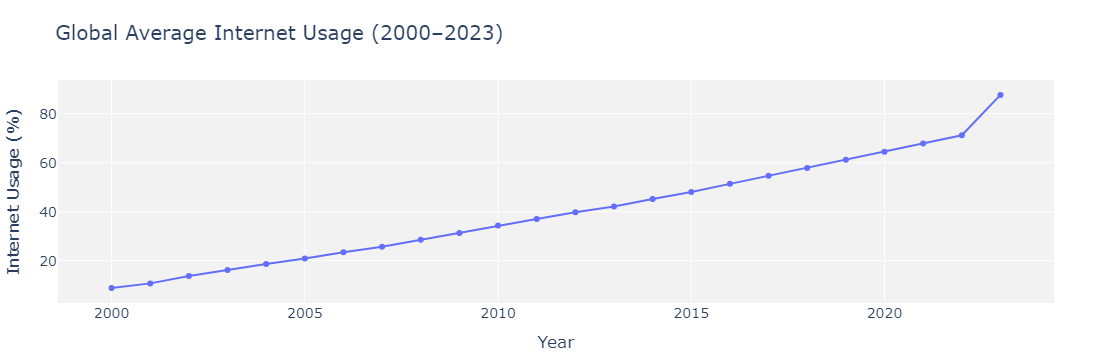

In [37]:
# Group by Year and calculate global average internet usage
global_usage = df.groupby('Year')['Internet Usage'].mean().reset_index()

# Create an interactive line plot using Plotly Express
fig = px.line(
    global_usage,
    x='Year',
    y='Internet Usage',
    markers=True,  # Add markers to the line plot
    title='Global Average Internet Usage (2000–2023)',
    labels={'Year': 'Year', 'Internet Usage': 'Internet Usage (%)'},
    hover_data=['Year', 'Internet Usage']  # Include additional data in tooltips
)

# Customize the layout
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Internet Usage (%)",
    font=dict(size=14),
    margin=dict(l=50, r=50, t=80, b=50),  # Adjust margins for better appearance
    hovermode="x",  # Tooltip shows data for the closest point on hover
    plot_bgcolor='rgba(230, 230, 230, 0.5)',  # Light background for better readability
    xaxis=dict(showgrid=True, gridcolor='white'),  # Enable x-axis gridlines
    yaxis=dict(showgrid=True, gridcolor='white')   # Enable y-axis gridlines
)

# Save the chart as a PNG file (using kaleido)
png_file_path = 'global_average_internet_usage.png'
fig.write_image(png_file_path, format='png')

# Show the figure
fig.show()

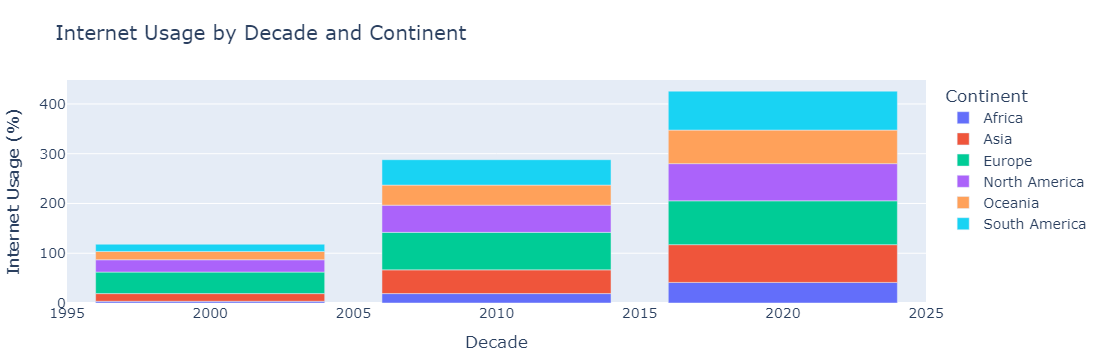

In [38]:
import pandas as pd
import plotly.express as px


# Step 1: Create a new column for decade intervals (if not already created)
df['Decade'] = (df['Year'] // 10) * 10

# Step 2: Group by Decade and Continent to calculate average Internet Usage
decade_usage = df.groupby(['Decade', 'Continent'])['Internet Usage'].mean().reset_index()

# Step 3: Create an interactive bar chart using Plotly Express
fig = px.bar(
    decade_usage,
    x='Decade',
    y='Internet Usage',
    color='Continent',
    title='Internet Usage by Decade and Continent',
    labels={'Decade': 'Decade', 'Internet Usage': 'Internet Usage (%)'},
    hover_data=['Decade', 'Continent', 'Internet Usage'],  # Add additional data to tooltips
)

# Step 4: Customize the layout for better interactivity
fig.update_layout(
    xaxis_title="Decade",
    yaxis_title="Internet Usage (%)",
    legend_title="Continent",
    font=dict(size=14),
    margin=dict(l=50, r=50, t=80, b=50),  # Adjust margins for better appearance
)

# Step 6: Save the chart as a PNG file (using kaleido)
png_file_path = 'internet_usage_by_decade_and_continent.png'
fig.write_image(png_file_path, format='png')

# Step 7: Display the chart
fig.show()


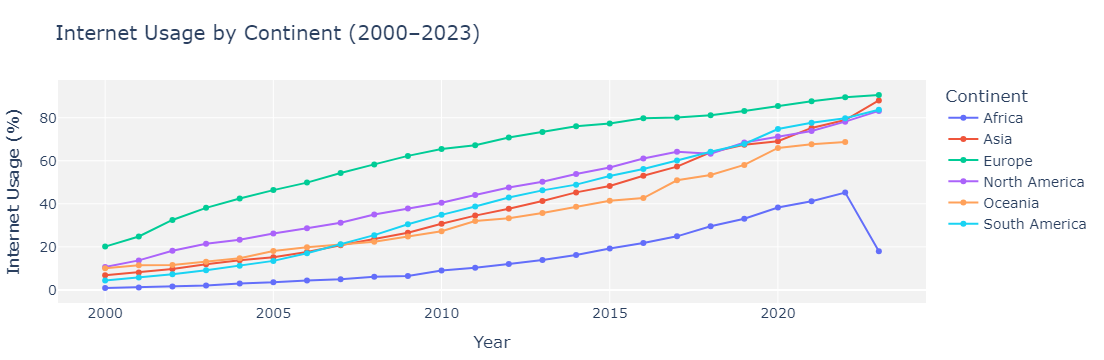

In [39]:
import pandas as pd
import plotly.express as px


# Group by Continent and Year
continent_usage = df.groupby(['Continent', 'Year'])['Internet Usage'].mean().reset_index()

# Create an interactive line plot using Plotly Express
fig = px.line(
    continent_usage,
    x='Year',
    y='Internet Usage',
    color='Continent',  # Different lines for each continent
    markers=True,       # Add markers to the line plot
    title='Internet Usage by Continent (2000–2023)',
    labels={'Year': 'Year', 'Internet Usage': 'Internet Usage (%)'},
    hover_data=['Year', 'Continent', 'Internet Usage']  # Include additional data in tooltips
)

# Customize the layout
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Internet Usage (%)",
    legend_title="Continent",
    font=dict(size=14),
    margin=dict(l=50, r=50, t=80, b=50),  # Adjust margins for better appearance
    hovermode="x unified",               # Unified tooltip for all lines at the same x-value
    plot_bgcolor='rgba(230, 230, 230, 0.5)',  # Light background for better readability
    xaxis=dict(showgrid=True, gridcolor='white'),  # Enable x-axis gridlines
    yaxis=dict(showgrid=True, gridcolor='white')   # Enable y-axis gridlines
)


# Save the chart as a PNG file (using kaleido)
png_file_path = 'internet_usage_by_continent.png'
fig.write_image(png_file_path, format='png')

# Display the chart
fig.show()


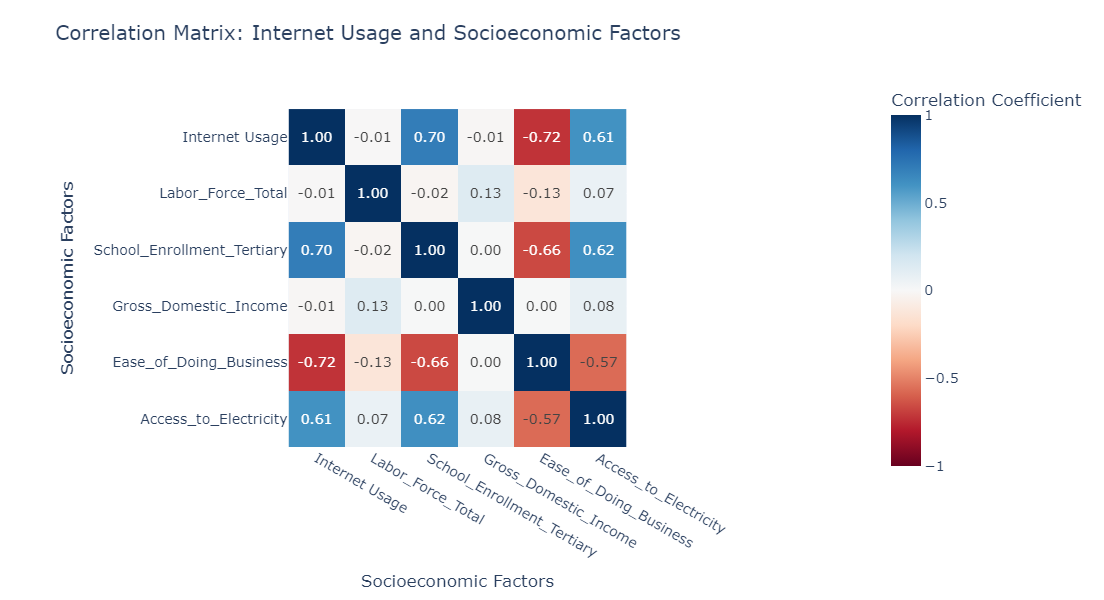

In [40]:

# Select relevant columns for correlation analysis
correlation_data = df[['Internet Usage', 'Labor_Force_Total', 'School_Enrollment_Tertiary', 
                       'Gross_Domestic_Income', 'Ease_of_Doing_Business', 'Access_to_Electricity']]

# Calculate correlation matrix
corr_matrix = correlation_data.corr()

# Create an interactive heatmap using Plotly Express
fig = px.imshow(
    corr_matrix,
    labels=dict(color="Correlation Coefficient"),  # Label for the color axis
    x=corr_matrix.columns,  # Column names for the x-axis
    y=corr_matrix.index,    # Row names for the y-axis
    color_continuous_scale='RdBu',  # Diverging color scale (red to blue)
    zmin=-1, zmax=1,        # Set range for the color scale
    text_auto=".2f"         # Display values in the cells with 2 decimal places
)

# Customize the layout
fig.update_layout(
    title="Correlation Matrix: Internet Usage and Socioeconomic Factors",
    xaxis_title="Socioeconomic Factors",
    yaxis_title="Socioeconomic Factors",
    font=dict(size=14),
    margin=dict(l=50, r=50, t=80, b=50),  # Adjust margins for better appearance
    width=800, height=600                 # Set dimensions of the heatmap
)

# Save the chart as an HTML file
html_file_path = 'correlation_matrix_socioeconomic_factors.html'
fig.write_html(html_file_path)

# Save the chart as a PNG file (using kaleido)
png_file_path = 'correlation_matrix_socioeconomic_factors.png'
fig.write_image(png_file_path, format='png')

# Display the chart
fig.show()


In [41]:
developed_countries = df[df['Development_Status'] == 'Developed']
Underdeveloped_countries = df[df['Development_Status'] == 'Underdeveloped']
Developing_countries = df[df['Development_Status'] == 'Developing']

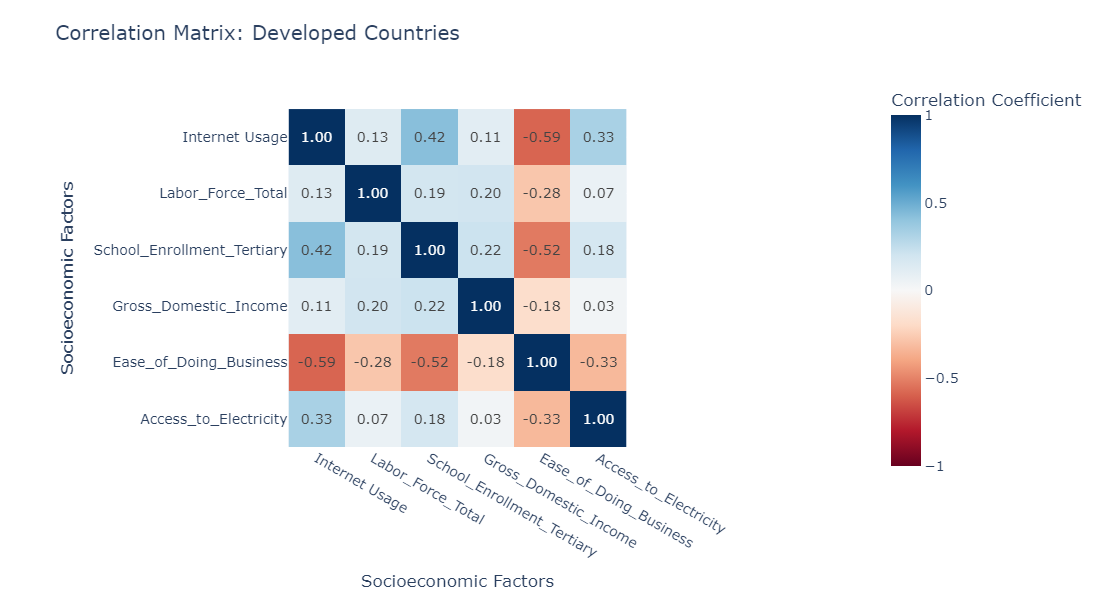

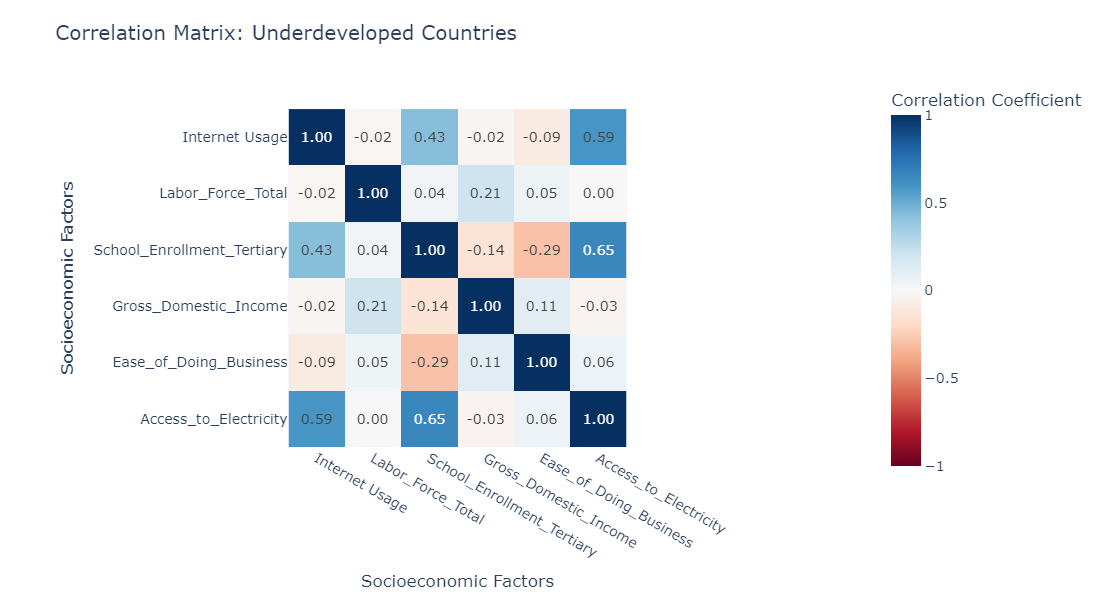

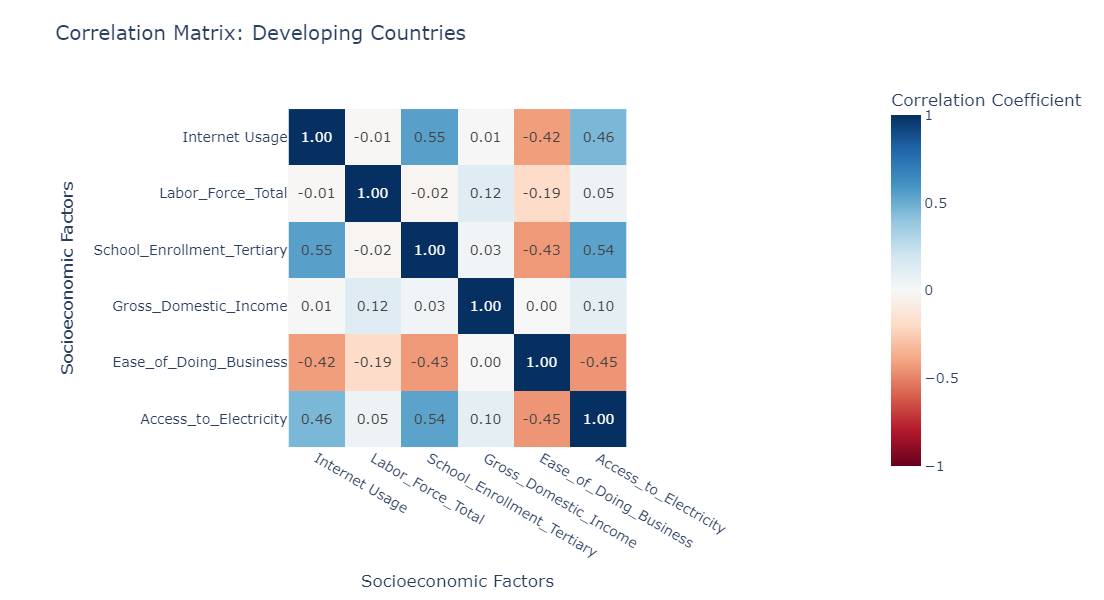

In [44]:
import pandas as pd
import plotly.express as px

# Define a function to create and save a heatmap for a given dataframe
def create_correlation_heatmap(df, title, html_filename, png_filename):
    # Select relevant columns for correlation analysis
    correlation_data = df[['Internet Usage', 'Labor_Force_Total', 'School_Enrollment_Tertiary', 
                           'Gross_Domestic_Income', 'Ease_of_Doing_Business', 'Access_to_Electricity']]
    
    # Calculate correlation matrix
    corr_matrix = correlation_data.corr()
    
    # Create an interactive heatmap using Plotly Express
    fig = px.imshow(
        corr_matrix,
        labels=dict(color="Correlation Coefficient"),  # Label for the color axis
        x=corr_matrix.columns,  # Column names for the x-axis
        y=corr_matrix.index,    # Row names for the y-axis
        color_continuous_scale='RdBu',  # Diverging color scale (red to blue)
        zmin=-1, zmax=1,        # Set range for the color scale
        text_auto=".2f"         # Display values in the cells with 2 decimal places
    )
    
    # Customize the layout
    fig.update_layout(
        title=title,
        xaxis_title="Socioeconomic Factors",
        yaxis_title="Socioeconomic Factors",
        font=dict(size=14),
        margin=dict(l=50, r=50, t=80, b=50),  # Adjust margins for better appearance
        width=800, height=600                 # Set dimensions of the heatmap
    )
    
    # Save the chart as an HTML file
    fig.write_html(html_filename)
    
    # Save the chart as a PNG file (using kaleido)
    fig.write_image(png_filename, format='png')
    
    # Optionally display the chart
    fig.show()

# Create heatmaps for each development status
create_correlation_heatmap(
    developed_countries,
    "Correlation Matrix: Developed Countries",
    "correlation_matrix_developed_countries.html",
    "correlation_matrix_developed_countries.png"
)

create_correlation_heatmap(
    Underdeveloped_countries,
    "Correlation Matrix: Underdeveloped Countries",
    "correlation_matrix_underdeveloped_countries.html",
    "correlation_matrix_underdeveloped_countries.png"
)

create_correlation_heatmap(
    Developing_countries,
    "Correlation Matrix: Developing Countries",
    "correlation_matrix_developing_countries.html",
    "correlation_matrix_developing_countries.png"
)


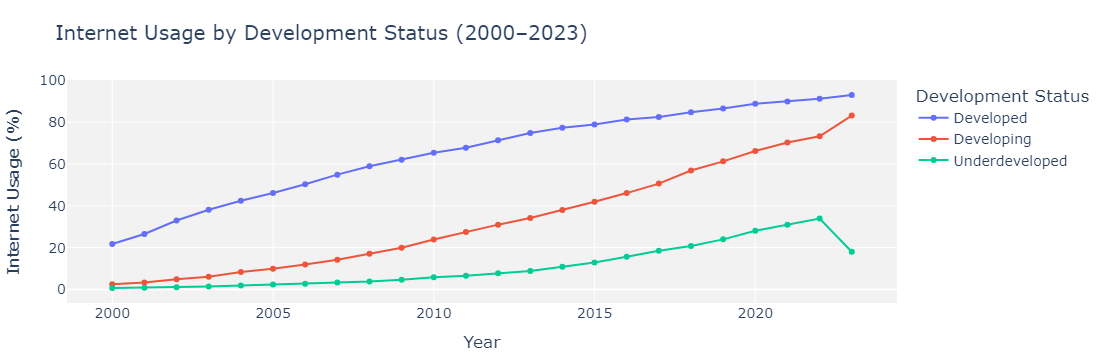

In [45]:
import pandas as pd
import plotly.express as px

# Group by Development Status and Year
development_usage = df.groupby(['Development_Status', 'Year'])['Internet Usage'].mean().reset_index()

# Create an interactive line plot using Plotly Express
fig = px.line(
    development_usage,
    x='Year',
    y='Internet Usage',
    color='Development_Status',  # Different lines for each development status
    markers=True,                # Add markers to the line plot
    title='Internet Usage by Development Status (2000–2023)',
    labels={'Year': 'Year', 'Internet Usage': 'Internet Usage (%)'},
    hover_data=['Year', 'Development_Status', 'Internet Usage']  # Include additional data in tooltips
)

# Customize the layout
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Internet Usage (%)",
    legend_title="Development Status",
    font=dict(size=14),
    margin=dict(l=50, r=50, t=80, b=50),  # Adjust margins for better appearance
    hovermode="x unified",               # Unified tooltip for all lines at the same x-value
    plot_bgcolor='rgba(230, 230, 230, 0.5)',  # Light background for better readability
    xaxis=dict(showgrid=True, gridcolor='white'),  # Enable x-axis gridlines
    yaxis=dict(showgrid=True, gridcolor='white')   # Enable y-axis gridlines
)


# Save the chart as a PNG file (using kaleido)
png_file_path = 'internet_usage_by_development_status.png'
fig.write_image(png_file_path, format='png')

# Display the chart
fig.show()


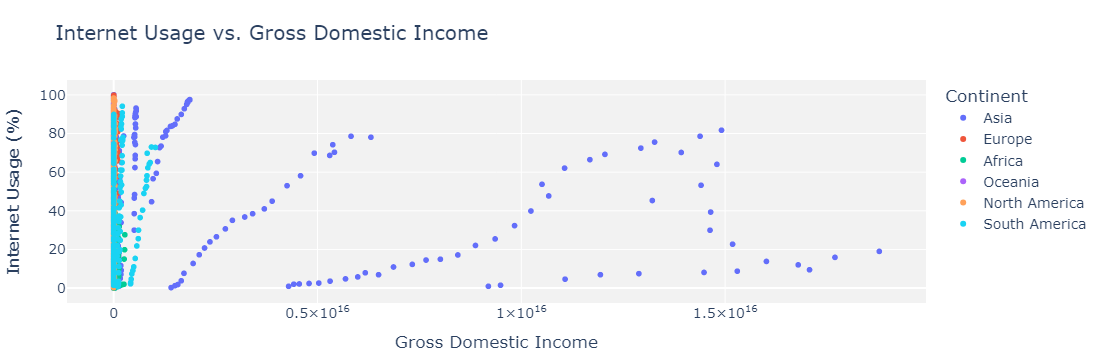

In [46]:
import pandas as pd
import plotly.express as px

# Create an interactive scatter plot using Plotly Express
fig = px.scatter(
    df,
    x='Gross_Domestic_Income',
    y='Internet Usage',
    color='Continent',  # Different colors for each continent
    hover_name='Country Name',  # Display country name on hover
    hover_data=['Gross_Domestic_Income', 'Internet Usage', 'Development_Status'],  # Additional data in tooltips
    title='Internet Usage vs. Gross Domestic Income',
    labels={'Gross_Domestic_Income': 'Gross Domestic Income', 'Internet Usage': 'Internet Usage (%)'}
)

# Customize the layout
fig.update_layout(
    xaxis_title="Gross Domestic Income",
    yaxis_title="Internet Usage (%)",
    legend_title="Continent",
    font=dict(size=14),
    margin=dict(l=50, r=50, t=80, b=50),  # Adjust margins for better appearance
    plot_bgcolor='rgba(230, 230, 230, 0.5)',  # Light background for better readability
    xaxis=dict(showgrid=True, gridcolor='white'),  # Enable x-axis gridlines
    yaxis=dict(showgrid=True, gridcolor='white')   # Enable y-axis gridlines
)

# Save the chart as a PNG file (using kaleido)
png_file_path = 'internet_usage_vs_gross_domestic_income.png'
fig.write_image(png_file_path, format='png')

# Display the chart
fig.show()


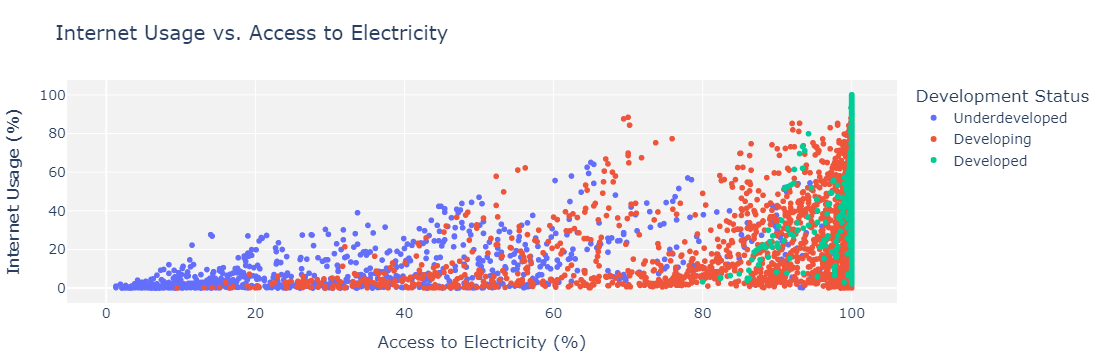

In [47]:
import pandas as pd
import plotly.express as px

# Create an interactive scatter plot using Plotly Express
fig = px.scatter(
    df,
    x='Access_to_Electricity',
    y='Internet Usage',
    color='Development_Status',  # Different colors for development status
    hover_name='Country Name',   # Display country name on hover
    hover_data=['Access_to_Electricity', 'Internet Usage', 'Continent'],  # Additional data in tooltips
    title='Internet Usage vs. Access to Electricity',
    labels={'Access_to_Electricity': 'Access to Electricity (%)', 'Internet Usage': 'Internet Usage (%)'}
)

# Customize the layout
fig.update_layout(
    xaxis_title="Access to Electricity (%)",
    yaxis_title="Internet Usage (%)",
    legend_title="Development Status",
    font=dict(size=14),
    margin=dict(l=50, r=50, t=80, b=50),  # Adjust margins for better appearance
    plot_bgcolor='rgba(230, 230, 230, 0.5)',  # Light background for better readability
    xaxis=dict(showgrid=True, gridcolor='white'),  # Enable x-axis gridlines
    yaxis=dict(showgrid=True, gridcolor='white')   # Enable y-axis gridlines
)


# Save the chart as a PNG file (using kaleido)
png_file_path = 'internet_usage_vs_access_to_electricity.png'
fig.write_image(png_file_path, format='png')

# Display the chart
fig.show()


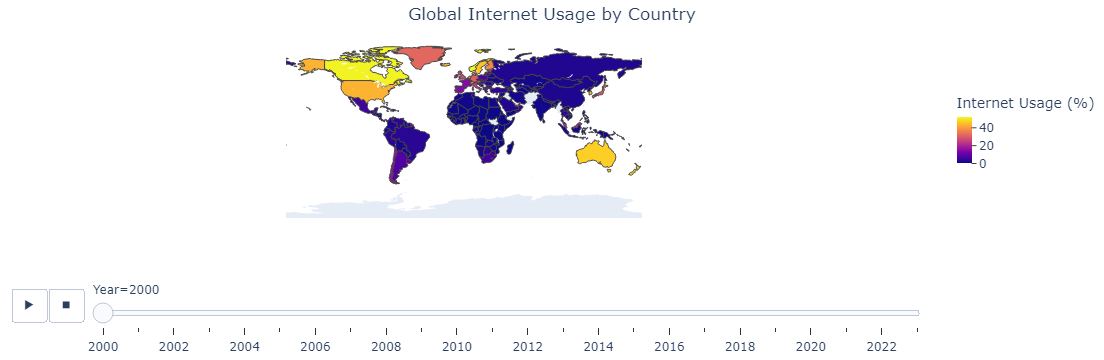

In [48]:
import plotly.express as px

# Create the choropleth map with tooltips
fig = px.choropleth(
    df,
    locations="Country Code",  # ISO country codes
    color="Internet Usage",    # Data to color the countries
    hover_name="Country Name", # Display the country name on hover
    hover_data=["Development_Status", "Access_to_Electricity", "Gross_Domestic_Income"],  # Additional data in tooltips
    animation_frame="Year",    # Animate by year
    color_continuous_scale=px.colors.sequential.Plasma,  # Color scale
    title="Global Internet Usage by Country"
)

# Customize each frame to update the title dynamically
for frame in fig.frames:
    year = frame.name  # The current year
    frame.layout.update(title_text=f"Global Internet Usage by Country in {year}")

# Customize the layout
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False),  # Remove borders and coastlines
    margin={"r":0,"t":40,"l":0,"b":0},               # Adjust margins
    title_x=0.5,                                     # Center the title
    coloraxis_colorbar=dict(                        # Customize the color bar
        title="Internet Usage (%)",
        thickness=15,
        len=0.5,
        yanchor="middle",
        y=0.5,
        ticks="outside"
    )
)

# Save the chart as a PNG file (using kaleido)
png_file_path = 'global_internet_usage_map_with_tooltips.png'
fig.write_image(png_file_path, format='png')

# Display the chart
fig.show()


In [49]:
columns_of_interest = ['Labor_Force_Total', 'School_Enrollment_Tertiary', 
                       'Gross_Domestic_Income', 'Ease_of_Doing_Business', 
                       'Access_to_Electricity']

In [50]:
df.shape

(5160, 13)

In [51]:
# Check for missing values
print(df[['Internet Usage'] + columns_of_interest].isnull().mean()* 100)
# Check the percentage of missing values in 'Internet Usage'

Internet Usage                11.259690
Labor_Force_Total             14.011628
School_Enrollment_Tertiary    40.484496
Gross_Domestic_Income         25.988372
Ease_of_Doing_Business        96.356589
Access_to_Electricity          5.542636
dtype: float64


In [52]:
df.shape

(5160, 13)

In [ ]:
!pip install missingno

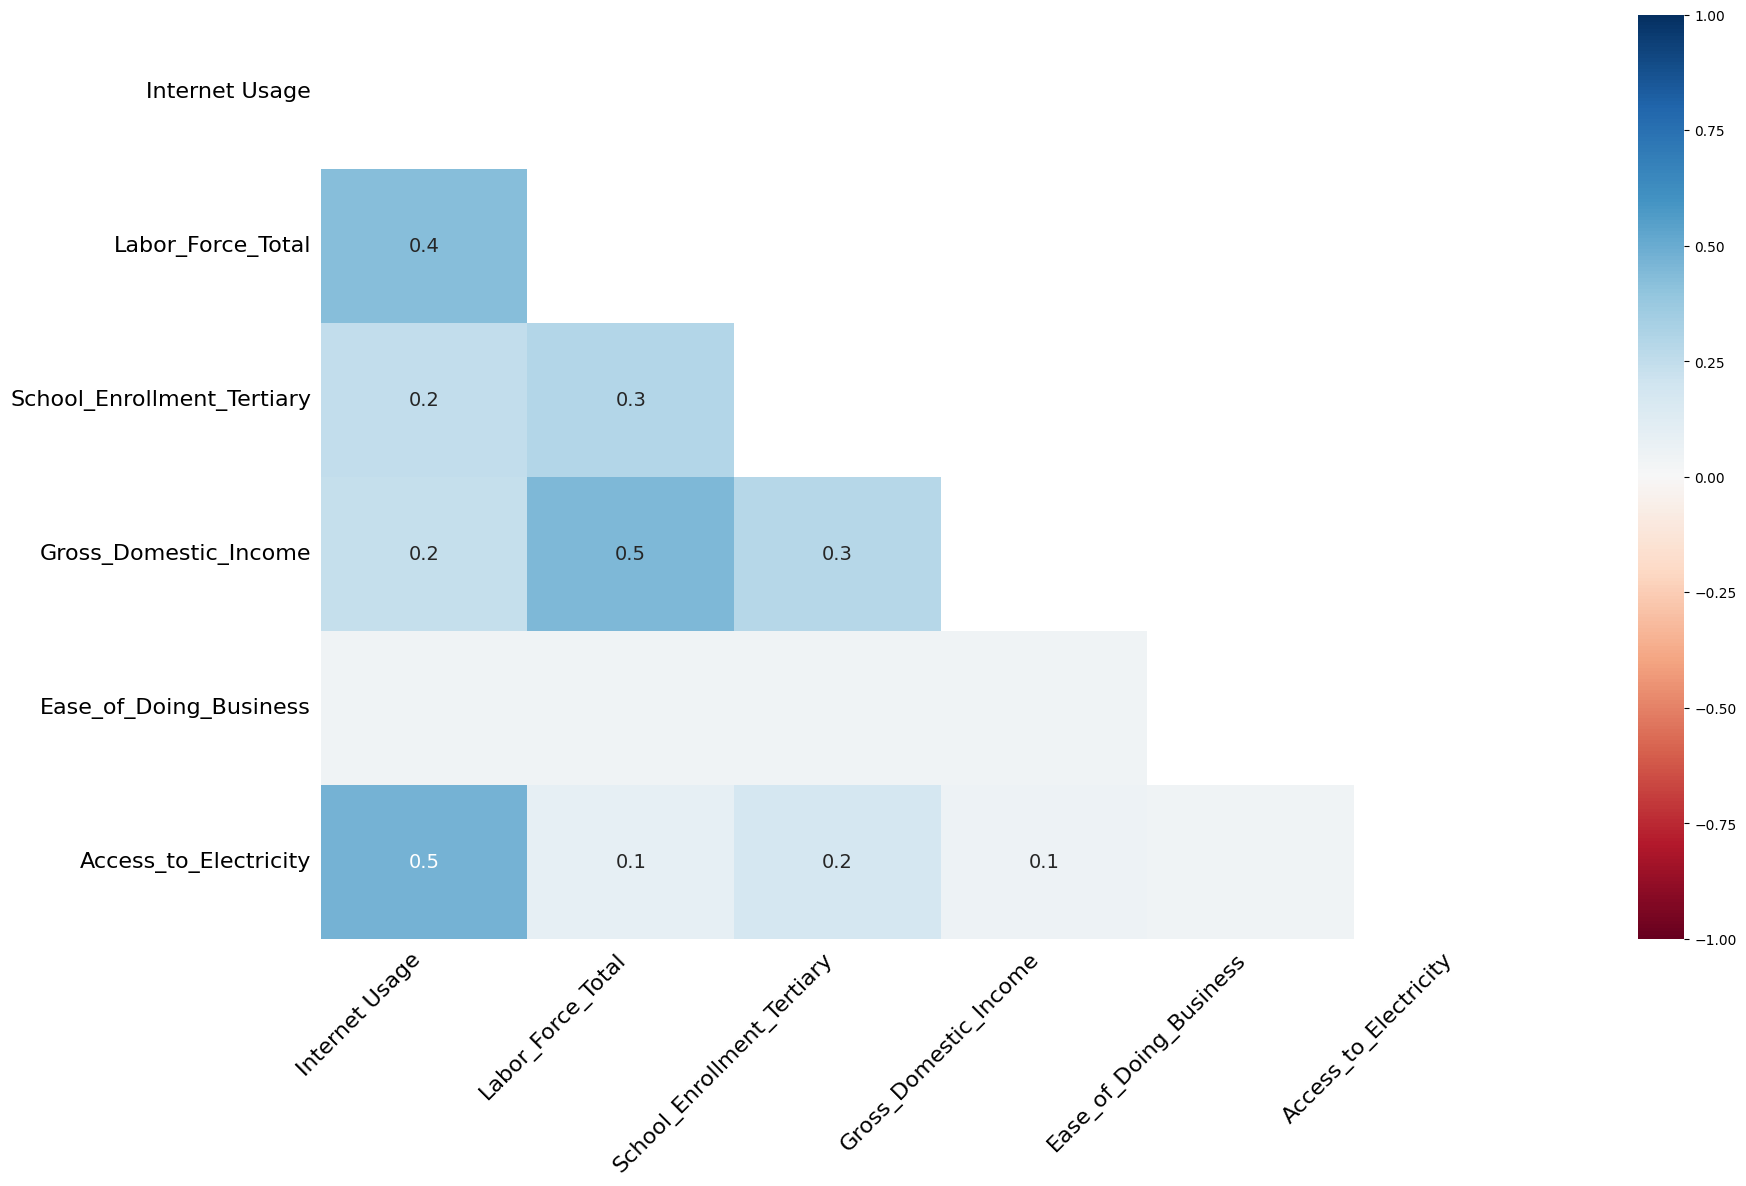

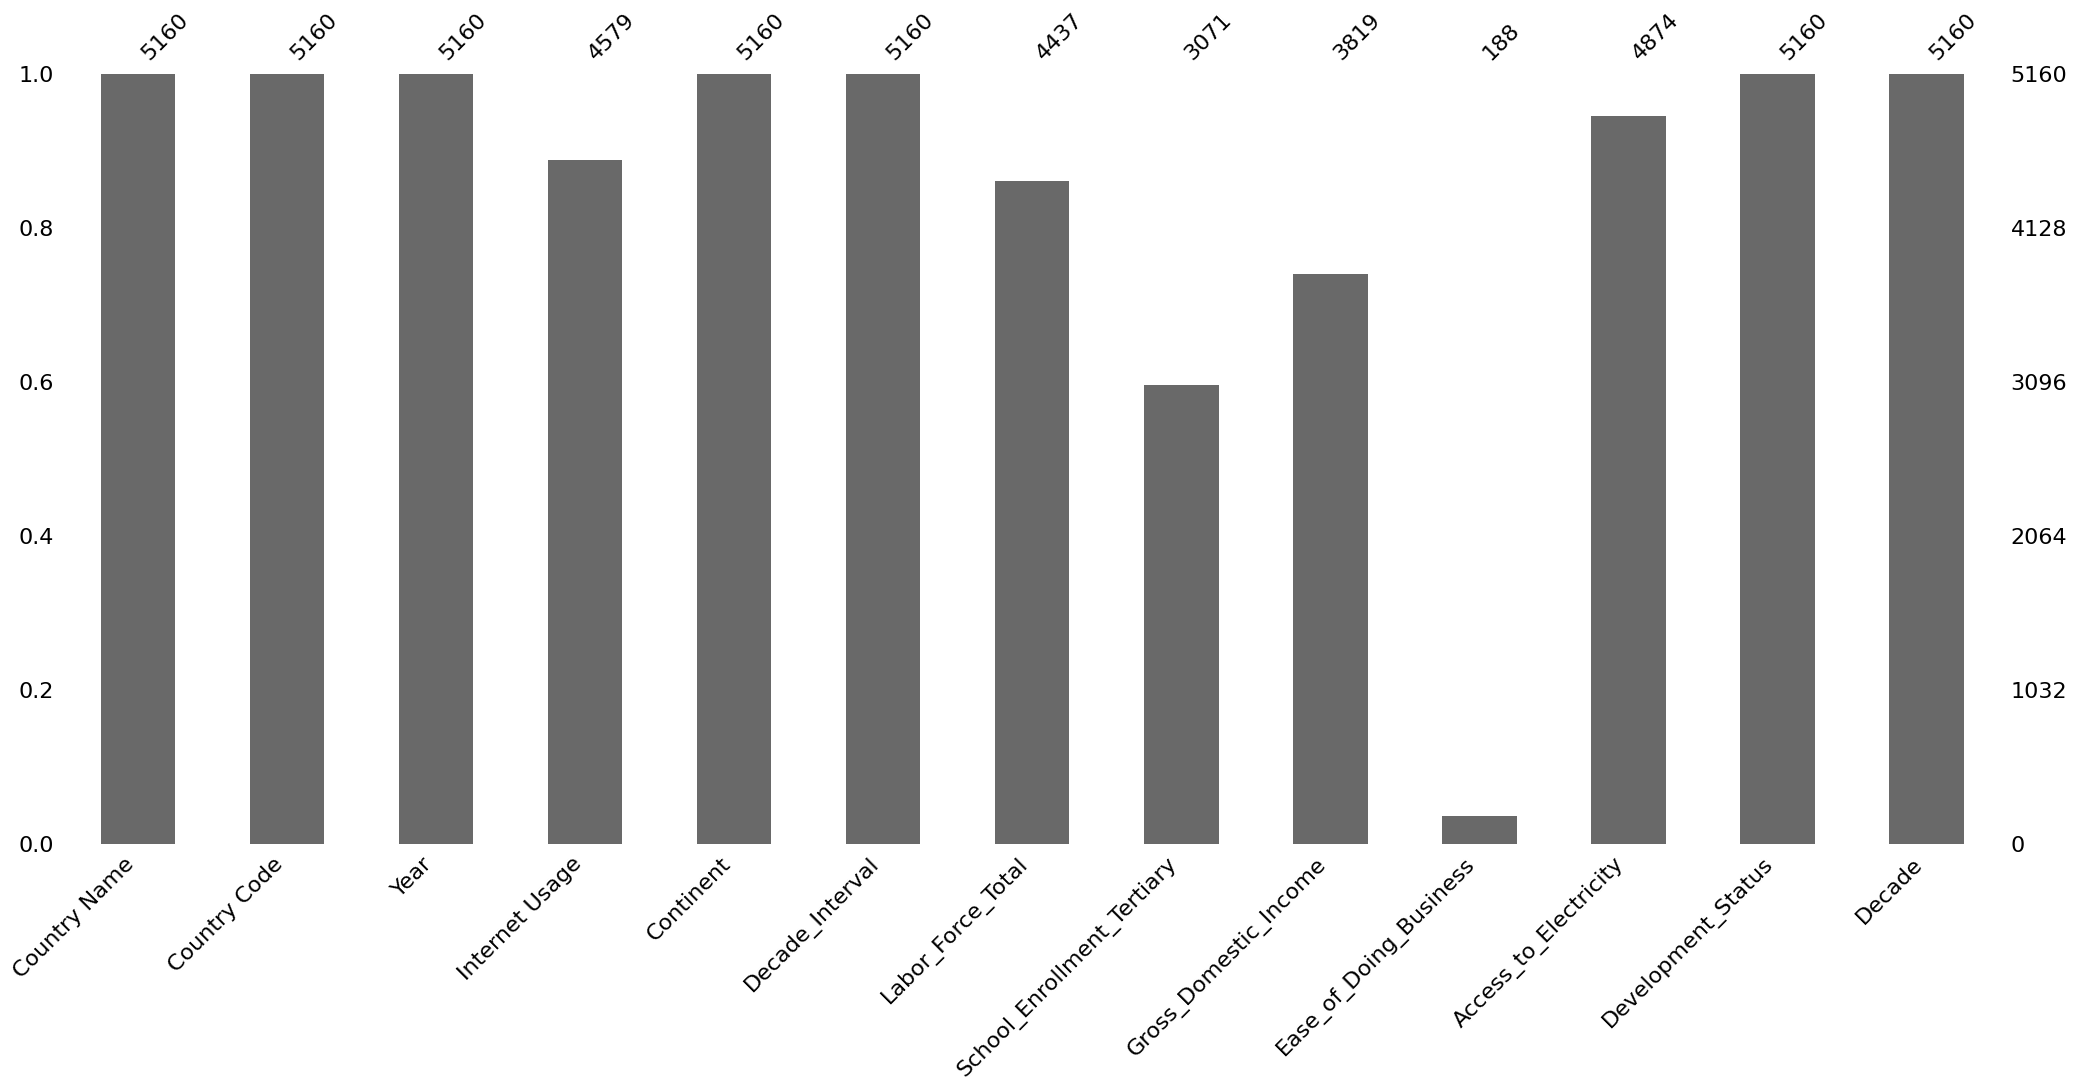

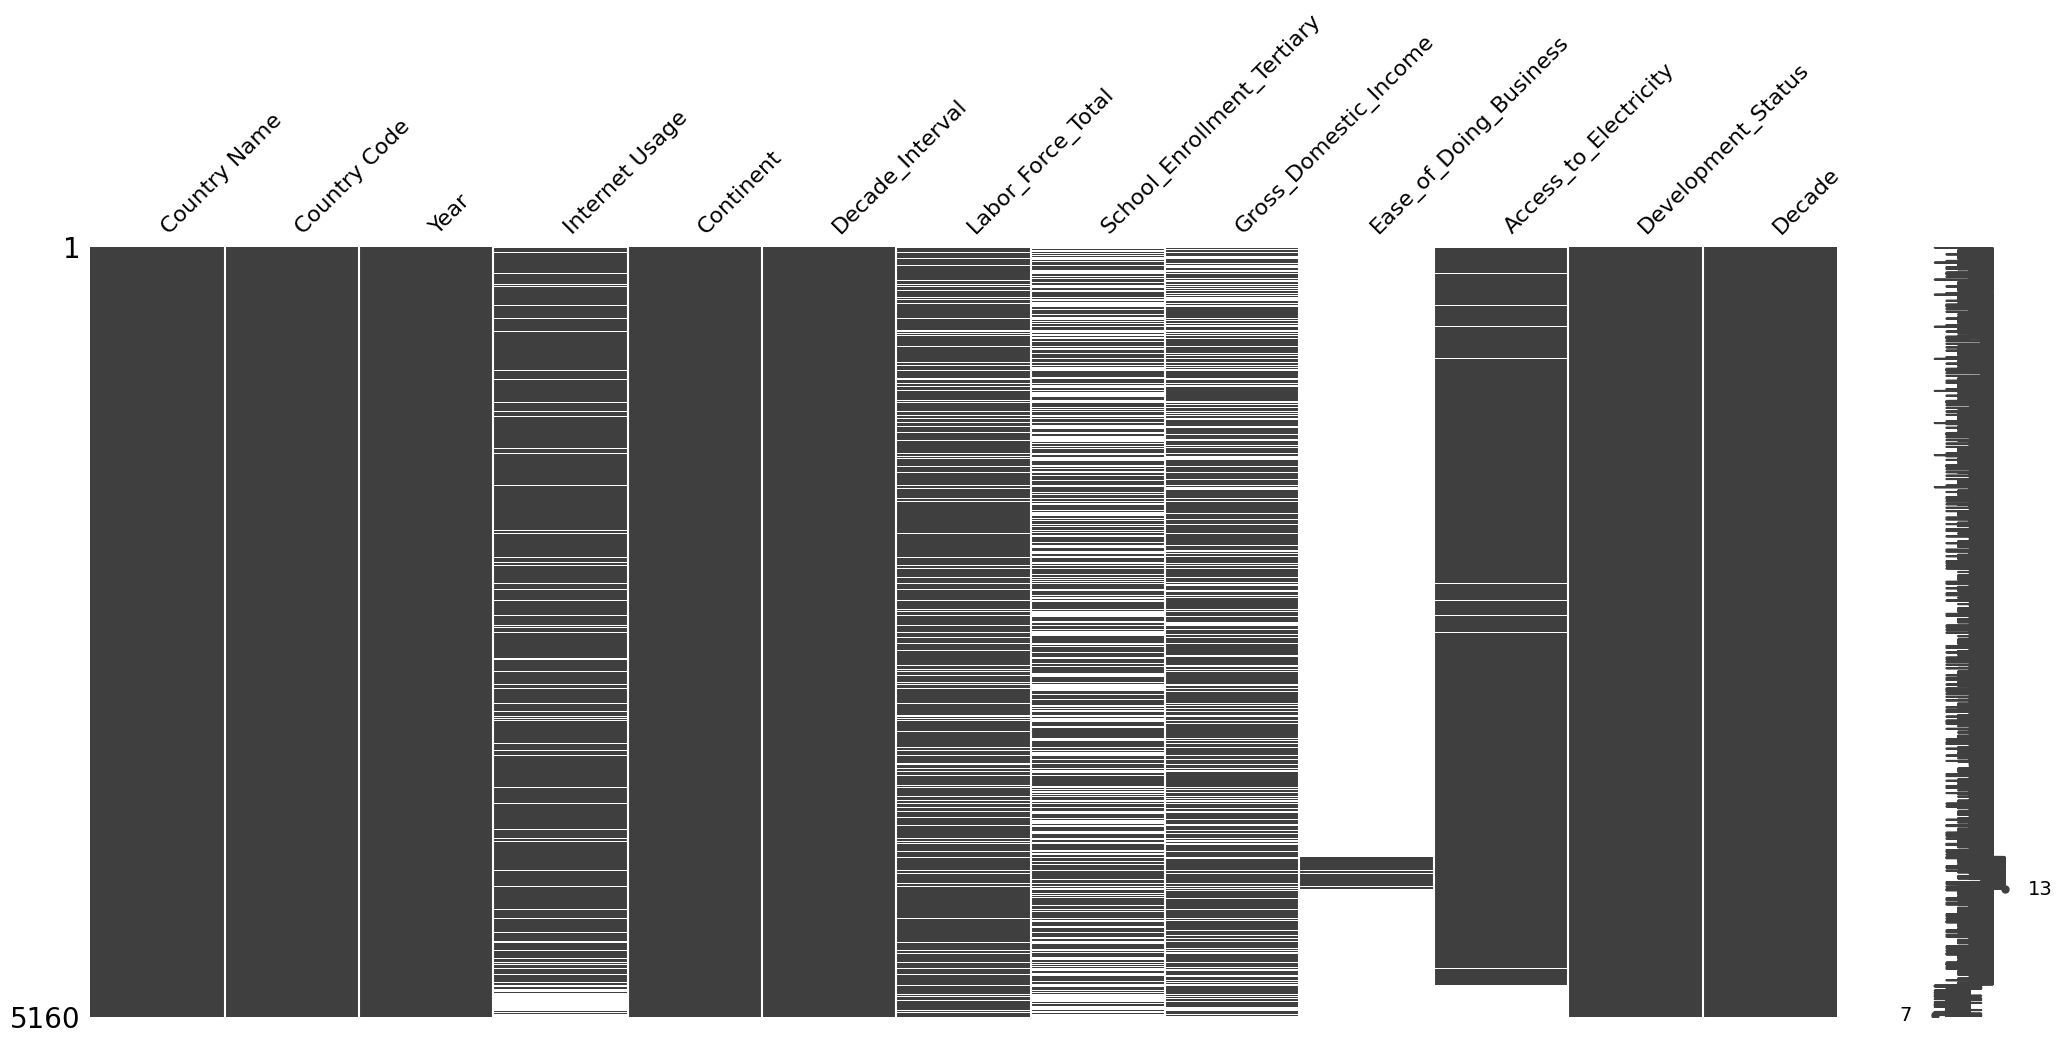

In [53]:
import missingno as msno
import matplotlib.pyplot as plt

# Visualize the missing values as a heatmap
msno.heatmap(df)
plt.savefig('missing_values_heatmap.png', dpi=300, bbox_inches='tight')  # Save the heatmap
plt.show()

# Visualize the missing values as a bar plot
msno.bar(df)
plt.savefig('missing_values_bar.png', dpi=300, bbox_inches='tight')  # Save the bar plot
plt.show()

# Visualize a matrix plot
msno.matrix(df)
plt.savefig('missing_values_matrix.png', dpi=300, bbox_inches='tight')  # Save the matrix plot
plt.show()


In [54]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5)
df['School_Enrollment_Tertiary'] = knn_imputer.fit_transform(df[['School_Enrollment_Tertiary']])

In [55]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
df['Gross_Domestic_Income'] = imputer.fit_transform(df[['Gross_Domestic_Income']])

In [56]:
imputer = SimpleImputer(strategy='mean')
df['Labor_Force_Total'] = imputer.fit_transform(df[['Labor_Force_Total']])

In [57]:
imputer = SimpleImputer(strategy='mean')
df['Internet Usage'] = imputer.fit_transform(df[['Internet Usage']])

In [58]:
df = df.dropna(subset=['Access_to_Electricity'])

In [59]:
df.drop(columns=['Ease_of_Doing_Business'], inplace=True)

In [60]:
from scipy.stats import ttest_ind
import numpy as np

# Internet Usage for Developed and Developing Countries
developed_countries = df[df['Development_Status'] == 'Developed']['Internet Usage']
developing_countries = df[df['Development_Status'] == 'Developing']['Internet Usage']

# Perform Welch's T-Test
t_stat, p_value = ttest_ind(developed_countries, developing_countries, equal_var=False, nan_policy='omit')

# Output results
print(f"Welch's T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference in internet usage between developed and developing countries.")
else:
    print("There is no statistically significant difference in internet usage between developed and developing countries.")

Welch's T-Statistic: 33.8665
P-Value: 0.0000
There is a statistically significant difference in internet usage between developed and developing countries.


In [61]:
import numpy as np
from scipy.stats import ttest_ind, norm

# Means and standard deviations
mean_developed = np.mean(developed_countries)
mean_developing = np.mean(developing_countries)
std_developed = np.std(developed_countries, ddof=1)  # Use Bessel's correction
std_developing = np.std(developing_countries, ddof=1)

# Sample sizes
n_developed = len(developed_countries)
n_developing = len(developing_countries)

# Pooled standard deviation
pooled_std = np.sqrt(((n_developed - 1) * std_developed**2 + (n_developing - 1) * std_developing**2) / (n_developed + n_developing - 2))

# Cohen's d
cohens_d = (mean_developed - mean_developing) / pooled_std

print(f"Cohen's d: {cohens_d:.4f}")

Cohen's d: 1.0930


In [62]:
import numpy as np
from scipy.stats import ttest_ind, t  # Import t for critical value calculation

# Means and standard deviations
mean_developed = np.mean(developed_countries)
mean_developing = np.mean(developing_countries)
std_developed = np.std(developed_countries, ddof=1)  # Use Bessel's correction
std_developing = np.std(developing_countries, ddof=1)

# Sample sizes
n_developed = len(developed_countries)
n_developing = len(developing_countries)

# Standard error of the difference in means
se_diff = np.sqrt((std_developed**2 / n_developed) + (std_developing**2 / n_developing))

# Welch's T-Test results
t_stat, p_value = ttest_ind(developed_countries, developing_countries, equal_var=False)

# Degrees of freedom (approximate for Welch's T-Test)
df_welch = ((std_developed**2 / n_developed + std_developing**2 / n_developing)**2) / \
           (((std_developed**2 / n_developed)**2 / (n_developed - 1)) + 
            ((std_developing**2 / n_developing)**2 / (n_developing - 1)))

# Critical value for 95% confidence interval
critical_value = t.ppf(0.975, df=df_welch)  # Use the imported t distribution

# Margin of error
margin_of_error = critical_value * se_diff

# Confidence interval
ci_lower = (mean_developed - mean_developing) - margin_of_error
ci_upper = (mean_developed - mean_developing) + margin_of_error

print(f"95% Confidence Interval: [{ci_lower:.4f}, {ci_upper:.4f}]")

95% Confidence Interval: [26.7132, 29.9962]


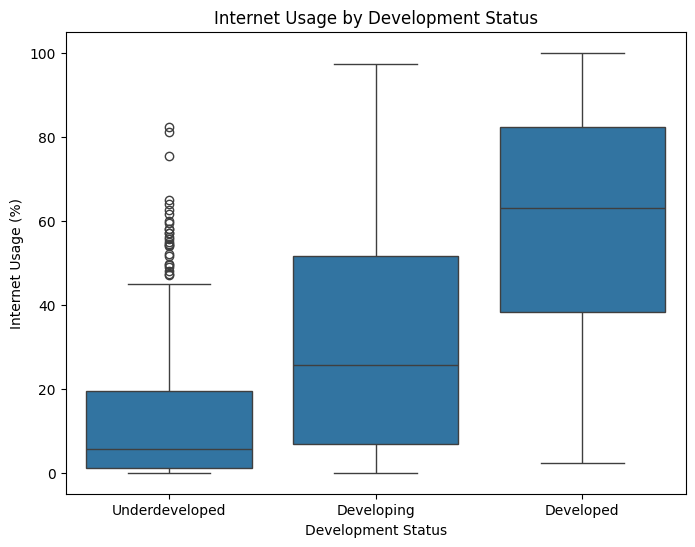

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine data for plotting
plot_data = df[['Development_Status', 'Internet Usage']].dropna()

# Create boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=plot_data, x='Development_Status', y='Internet Usage')
plt.title('Internet Usage by Development Status')
plt.xlabel('Development Status')
plt.ylabel('Internet Usage (%)')
plt.show()

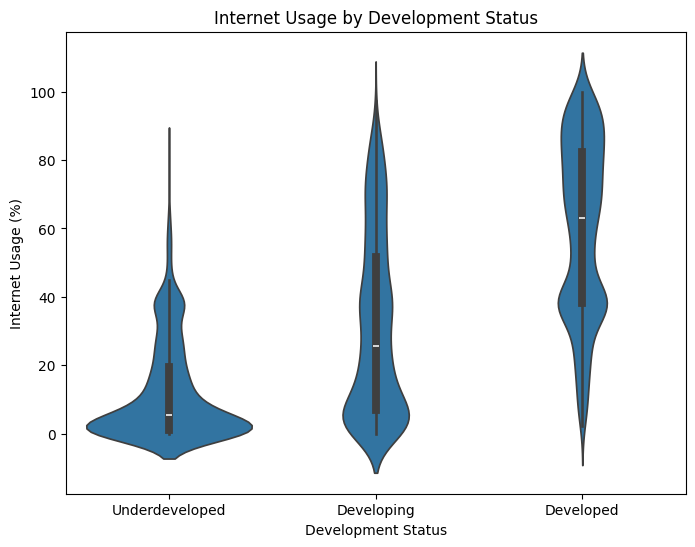

In [64]:
# Create violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(data=plot_data, x='Development_Status', y='Internet Usage')
plt.title('Internet Usage by Development Status')
plt.xlabel('Development Status')
plt.ylabel('Internet Usage (%)')
plt.show()

In [65]:
from scipy import stats
# Drop rows with missing values in the relevant columns
df_cleaned = df[['Labor_Force_Total', 'School_Enrollment_Tertiary', 
                       'Gross_Domestic_Income','Internet Usage',
                       'Access_to_Electricity']]

# Now calculate the correlations again
correlation_results = []
for column in ['Labor_Force_Total', 'School_Enrollment_Tertiary', 
                       'Gross_Domestic_Income','Internet Usage',
                       'Access_to_Electricity']:
    corr, p_value = stats.pearsonr(df_cleaned['Internet Usage'], df_cleaned[column])
    correlation_results.append({
        'Column': column,
        'Pearson Correlation': corr,
        'P-Value': p_value,
        'Significant': 'Yes' if p_value < 0.05 else 'No'
    })

correlation_df = pd.DataFrame(correlation_results)
correlation_df

Column  Pearson Correlation   P-Value Significant
0           Labor_Force_Total            -0.008970  0.531253          No
1  School_Enrollment_Tertiary             0.576296  0.000000         Yes
2       Gross_Domestic_Income            -0.006989  0.625684          No
3              Internet Usage             1.000000  0.000000         Yes
4       Access_to_Electricity             0.589702  0.000000         Yes